<a href="https://colab.research.google.com/github/naranjitoct/UPCT_IA_2022/blob/main/00_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. DATA WRANLING - RICARDO SERON GRACIA

#1.1. IMPORTING LIBRARIES AND MOUNTING DRIVE UNIT 
(ONLY NEED TO DO ONCE)

Also some warning deactivation

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Removing warning by slicing utilization.
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

#1.2. Extracting data from CSV files

In [5]:
data_drink=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/DW/drinks.csv')
data_life=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/DW/lifeexpectancy.csv')

#1.3. ANALYZING BOTH DATA SETS

## ✅ Let's take an OVERVIEW  to the tables

In [6]:
print(data_drink.shape)
print(data_life.shape)

(193, 5)
(6408, 16)


In [7]:
data_drink.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,NaN
1,Albania,89,132,54,NaN
2,Algeria,25,0,14,NaN
3,Andorra,245,138,312,NaN
4,Angola,217,57,45,NaN


☑ total_litres_of_pure_alcohol is a column that should be calculated from the servings (we will see later)

In [8]:
data_drink.info() ## Something to review as all columns are not numerical...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    object 
 2   spirit_servings               193 non-null    object 
 3   wine_servings                 193 non-null    object 
 4   total_litres_of_pure_alcohol  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 7.7+ KB


In [9]:
data_life.head(5)

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,FMLE,Female,62,61.97733
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,MLE,Male,61,60.51228
3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,60,60.00000
4,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,FMLE,Female,61,61.00000


ℹ      CountryDisplay & country are columns to match the data

In [10]:
data_life.info() # Most of the columns are repeated. Should be avoided (no extra info) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GhoCode                        6408 non-null   object 
 1   GhoDisplay                     6408 non-null   object 
 2   PublishStateCode               6408 non-null   object 
 3   PublishStateDisplay            6408 non-null   object 
 4   YearCode                       6408 non-null   int64  
 5   YearDisplay                    6408 non-null   int64  
 6   RegionCode                     6408 non-null   object 
 7   RegionDisplay                  6408 non-null   object 
 8   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 9   WorldBankIncomeGroupDisplay    5244 non-null   object 
 10  CountryCode                    6408 non-null   object 
 11  CountryDisplay                 6408 non-null   object 
 12  SexCode                        6408 non-null   o

## ✅ Some specific review of each column
---


In [ ]:
temp=data_life.loc[data_life['WorldBankIncomeGroupGroupCode']=='WB_LMI'] #Not really neccesary . Only used as example of how to filter 
temp

☝ ToDO: I will combine (merge) both datasets by using Country Display vs country column

As noticed below :
data_drink['country'] --- Length: 193
data_life['CountryDisplay'] --- Length: 194

I should work with those columns to assure the match perfectly. Data life contains 1 country more than data_drink


In [12]:
print(data_drink['country'].value_counts())   #193 countries 

Afghanistan      1
Lithuania        1
Nicaragua        1
Niger            1
Nigeria          1
                ..
Grenada          1
Guatemala        1
Guinea           1
Guinea-Bissau    1
Zimbabwe         1
Name: country, Length: 193, dtype: int64


In [13]:
#print(data_life['CountryDisplay'].nunique())   #194 countries
print(data_life['CountryDisplay'].value_counts())  # 33 data for every country except South Sudan #194 countries (mismatch with previous column... 

South Sudan    39
Afghanistan    33
Nicaragua      33
Nigeria        33
Niue           33
               ..
Greece         33
Grenada        33
Guatemala      33
Guinea         33
Zimbabwe       33
Name: CountryDisplay, Length: 194, dtype: int64


In [ ]:
temp=data_life.loc[data_life['CountryDisplay']=='Spain']
temp

In [ ]:
temp=data_life.loc[data_life['CountryDisplay']=='South Sudan']
temp #Sudan has 39 registers and this is more than the rest . This is because WorldBankIncomeGroupGroupCode that combines Low & Low middle income

In [16]:
print(data_life['GhoCode'].value_counts())
print('------------------------\n')
print(data_life['GhoDisplay'].value_counts())  ## It is the same as before (text instead code)
print('------------------------\n')
print(data_life['PublishStateCode'].value_counts())  ## Not important. Always the same
print('------------------------\n')
print(data_life['YearCode'].value_counts())  
print('------------------------\n')
print(data_life['RegionDisplay'].value_counts())  
print('------------------------\n')
print(data_life['WorldBankIncomeGroupGroupCode'].value_counts())  ## Income for the people
print('------------------------\n')
print(data_life['SexCode'].value_counts())  ## BTSX is an average . These lines could be deleted if considering male/female independently

WHOSIS_000001    2328
WHOSIS_000015    2328
WHOSIS_000002    1752
Name: GhoCode, dtype: int64
------------------------

Life expectancy at birth (years)                   2328
Life expectancy at age 60 (years)                  2328
Healthy life expectancy (HALE) at birth (years)    1752
Name: GhoDisplay, dtype: int64
------------------------

PUBLISHED    6408
Name: PublishStateCode, dtype: int64
------------------------

2012    1749
2000    1749
2013    1746
1990    1164
Name: YearCode, dtype: int64
------------------------

Europe                   1749
Africa                   1524
Americas                 1155
Western Pacific           891
Eastern Mediterranean     726
South_East Asia           363
Name: RegionDisplay, dtype: int64
------------------------

WB_LMI    1440
WB_HI     1377
WB_UMI    1215
WB_LI     1212
Name: WorldBankIncomeGroupGroupCode, dtype: int64
------------------------

BTSX    2136
FMLE    2136
MLE     2136
Name: SexCode, dtype: int64


---

#1.4 DATA_LIFE - CLEANSING 

As seen we should rename some countries in the original datasets.

In [17]:
# These lines should be executed just only during the rename process.

# they will be used for a wrapping text issue (with UK) 
print('------ AVOID WRAPPING in UK ----------')
UKtemp=data_life[data_life['CountryDisplay'].str.contains("United Kingdom of")]
print(UKtemp.iloc[1]['CountryDisplay'])
UK_modify=UKtemp['CountryDisplay']
print('\n\n------- DATA LIFE ----------')
# Sudan exists with 2 names in data_life but only one reference in data_drink
temp1=data_life[data_life['CountryDisplay'].str.contains("Sudan")]
temp1=temp1['CountryDisplay'].drop_duplicates()
print(temp1)
print('\n\n------- DATA DRINK ----------')
temp1=data_drink[data_drink['country'].str.contains("Sudan")]
temp1=temp1['country'].drop_duplicates()
print(temp1)


------ AVOID WRAPPING in UK ----------
United Kingdom of Great Britain and Northern Ireland


------- DATA LIFE ----------
5280    South Sudan
5385          Sudan
Name: CountryDisplay, dtype: object


------- DATA DRINK ----------
163    Sudan
Name: country, dtype: object


❗ Once this rename is taking place we could re-execute previous two lines and differences will be reduce to 0


Needed as UK name is larger than shown in display

In [ ]:
temp=data_life.loc[~data_life.CountryDisplay.isin(data_drink.country)] #♥Rows in data_life that are not in data_drink
temp=temp['CountryDisplay'].drop_duplicates()
#temp=temp.drop_duplicates(subset='CountryCode', keep="first")
print ('Hay ',temp.size,' diferencias')
print(temp)


In [ ]:
temp=data_drink.loc[~data_drink.country.isin(data_life.CountryDisplay)]
temp=temp['country'].drop_duplicates()
print ('Hay ',temp.size,' diferencias')
print(temp)


In [20]:
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Antigua and Barbuda'], 'Antigua & Barbuda')
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Bolivia (Plurinational State of)'], 'Bolivia')
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Bosnia and Herzegovina', 'Brunei Darussalam',"Côte d'Ivoire" ], ['Bosnia-Herzegovina', 'Brunei', "Cote d'Ivoire"])
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(["Democratic People's Republic of Korea", 'Democratic Republic of the Congo',"Guinea_Bissau" ], ['North Korea', 'DR Congo', "Guinea-Bissau"])  # NorthKorea is RD Korea
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Iran (Islamic Republic of)', "Lao People's Democratic Republic","Micronesia (Federated States of)" ], ['Iran', 'Laos', "Micronesia"])
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Republic of Korea', 'Republic of Moldova',"Saint Kitts and Nevis" ], ['South Korea', 'Moldova', "St. Kitts & Nevis"])  #https://en.wikipedia.org/wiki/South_Korea
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Saint Lucia', 'Saint Vincent and the Grenadines',"Sao Tome and Principe" ], ['St. Lucia', 'St. Vincent & the Grenadines', "Sao Tome & Principe"])
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Syrian Arab Republic', 'The former Yugoslav republic of Macedonia',"Timor_Leste" ], ['Syria', 'Macedonia', "Timor-Leste"])
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Trinidad and Tobago', "United Kingdom of Great Britain and Northern Ireland","United Republic of Tanzania" ], ['Trinidad & Tobago', 'United Kingdom', "Tanzania"]) #It doesn't work. ... is wrapped text.
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['United States of America', 'Venezuela (Bolivarian Republic of)',"Viet Nam" ], ['USA', 'Venezuela', "Vietnam"])
#data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['South Sudan'], 'Sudan') ... South Sudan is not Sudan ... que quedará fuera...
#data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['1', '2',"3" ], ['1', '2', "3"])

Repeat the same ... Reduce unmatched values to 0

In [21]:
temp=data_life.loc[~data_life.CountryDisplay.isin(data_drink.country)] #♥Rows in data_life that are not in data_drink
temp=temp['CountryDisplay'].drop_duplicates()
#temp=temp.drop_duplicates(subset='CountryCode', keep="first")
print ('Hay ',temp.size,' diferencias')
print(temp)


Hay  1  diferencias
5280    South Sudan
Name: CountryDisplay, dtype: object


In [22]:
temp=data_drink.loc[~data_drink.country.isin(data_life.CountryDisplay)]
temp=temp['country'].drop_duplicates()
print ('Hay ',temp.size,' diferencias')
print(temp)


Hay  0  diferencias
Series([], Name: country, dtype: object)


Blanks detected will be used later. No issues
In this dataset no further action will be taken

In [ ]:
#NULLS?
print(pd.isnull(data_life).sum())

In [ ]:
#NAN?
print(pd.isna(data_life).sum())

In [25]:
data_life.rename(columns = {'CountryDisplay':'country'}, inplace = True) 

---

#1.5  DATA_DRINK - CLEANSING 

Blanks will be calculated (total_liters...)

In [52]:
#NULLS?
print(pd.isnull(data_drink).sum())

country                           0
beer_servings                     0
spirit_servings                   0
wine_servings                     0
total_litres_of_pure_alcohol    193
dtype: int64


In [53]:
#NAN?
print(pd.isna(data_drink).sum())

country                           0
beer_servings                     0
spirit_servings                   0
wine_servings                     0
total_litres_of_pure_alcohol    193
dtype: int64


## ❗ FAILURE !!! .... Character '?' has been used instead of blanks, nulls ...

ValueError: could not convert string to float: '?'

In [54]:
# Error when trying to cast from string to float. Message notices '?' character
#     ValueError: could not convert string to float: '?'
data_drink.beer_servings = data_drink.beer_servings.astype(float) 

ValueError: ignored

SIDE NOTE (to remember):

>> **loc** is based on columns name

> >**iloc** similar but based on column ID (from 0)





pandas.Series.str.contains

 Test if pattern or regex (Regular expresion) is contained within a string of a Series or Index.

  regexbool, default True

  > If True, assumes the pat is a regular expression.

  > If False, treats the pat as a literal string.

 
 These are examples that clarify this REGular EXpresion concept

data_drink.loc[data_drink['beer_servings'].str.contains('11?49', regex=False)] 

data_drink.loc[data_drink['beer_servings'].str.contains('11?49', regex=True)]

In [55]:
data_drink.loc[data_drink['beer_servings'].str.contains('?', regex=False)] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
99,Macedonia,?,27,86,NaN


In [56]:
data_drink.loc[data_drink['spirit_servings'].str.contains('?', regex=False)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
46,Denmark,224,?,278,NaN


In [57]:
data_drink.loc[data_drink['wine_servings'].str.contains('?', regex=False)] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
11,Bahamas,122,176,?,NaN


##Replacing '?' . 

What is the best approach ?

 >> #1. Using mean/median for the column. (I guess not so goood...

 >> #2. We could drop as they are 3 among aprox 200.... and forget about them. In this example we could lost more data in future steps.

 >> #3. Ratio Average of consum for the rest of the countries


 I will calculate to execute #3 as it could be a good approach that could avoid data losses and simple column average could penalize last column calculation for these 3 countries that is pretended to be used later in the process instead of separated drinks.

 Also it will combine lot of slicing, filters, ...etc. So it is also great to practice

 

In [58]:
df=data_drink
df = data_drink[ (data_drink['beer_servings'] != '?') & (data_drink['spirit_servings'] != '?') & (data_drink['wine_servings'] != '?')]
df.shape # Original was (193,5). Three rows will be drop (Macedonia, Denmark and Bahamas)

(190, 5)

In [59]:
# Now 3 rows with issue are dropped I could cast columns as float. 
df.beer_servings = df.beer_servings.astype(float) 
df.spirit_servings = df.spirit_servings.astype(float) 
df.wine_servings = df.wine_servings.astype(float) 

In [60]:
# That's better... Float64 for our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       190 non-null    object 
 1   beer_servings                 190 non-null    float64
 2   spirit_servings               190 non-null    float64
 3   wine_servings                 190 non-null    float64
 4   total_litres_of_pure_alcohol  0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 8.9+ KB


As indication of the dataframe webportal. Total_litres column should be calculated based on an alcohol graduation stimation

REFERENCE (and stimation) :

https://www.binghamton.edu/hpps/atod/standarddrink.html#:~:text=12%20ounces%20of%20regular%20beer,proof%20liquor%3A%20about%2050%25%20ABV

12 ounces of regular beer: about 5% alcohol by volume (ABV)

5 ounces of wine: about 12% ABV

1.5 ounces of 80-proof liquor (vodka, rum, tequila, etc): about 40% ABV

1 ounce of 100-proof liquor: about 50% ABV

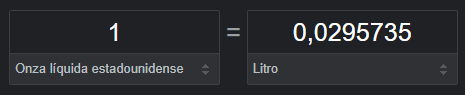




In [61]:
df.total_litres_of_pure_alcohol = (12*0.0295*0.05*df.beer_servings)+(1.5*0.0295*0.4*df.spirit_servings)+(5*0.0295*0.12*df.wine_servings)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f6c7a0e5cd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f6c7a0e5b20>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f6c7a0f1130>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f6c7a0f1400>}

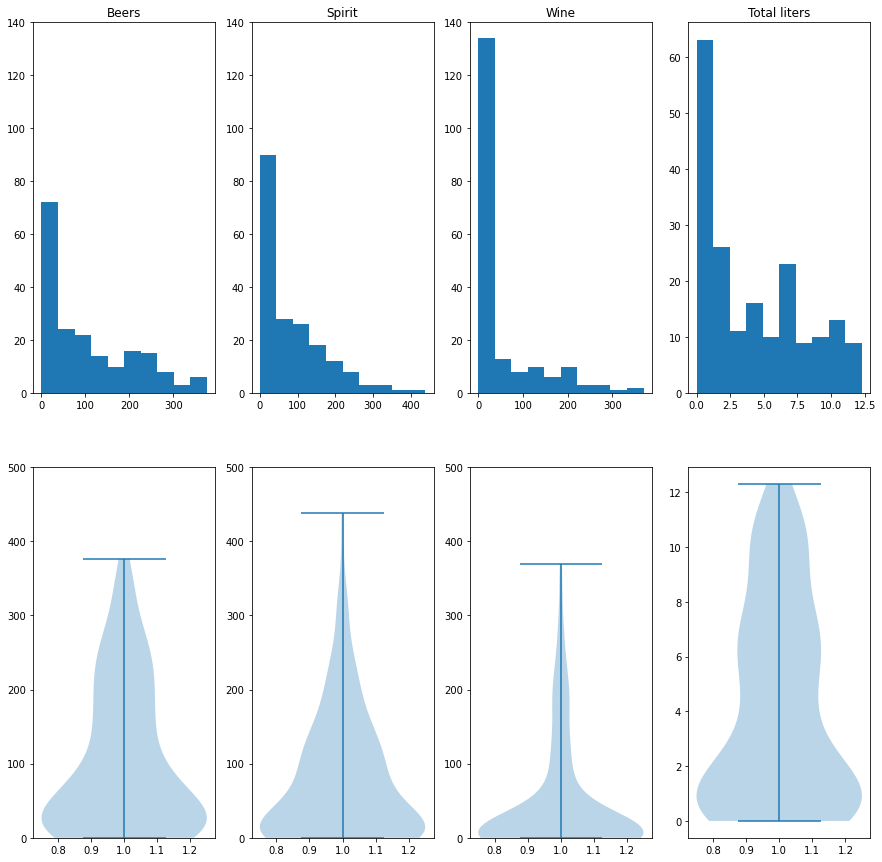

In [62]:
fig,ax = plt.subplots(2,4,figsize=(15, 15))

ax[0,0].hist(df['beer_servings'])
ax[0,0].set_title('Beers')
ax[0,0].set_ylim(0,140)
ax[0,1].hist(df['spirit_servings'])
ax[0,1].set_title('Spirit')
ax[0,1].set_ylim(0,140)
ax[0,2].hist(df['wine_servings'])
ax[0,2].set_title('Wine')
ax[0,2].set_ylim(0,140)
ax[0,3].hist(df['total_litres_of_pure_alcohol'])
ax[0,3].set_title('Total liters')

ax[1,0].violinplot(df['beer_servings'])
ax[1,0].set_ylim(0,500)
ax[1,1].violinplot(df['spirit_servings'])
ax[1,1].set_ylim(0,500)
ax[1,2].violinplot(df['wine_servings'])
ax[1,2].set_ylim(0,500)
ax[1,3].violinplot(df['total_litres_of_pure_alcohol'])


Text(0.5, 1.0, 'Total(ltr)')

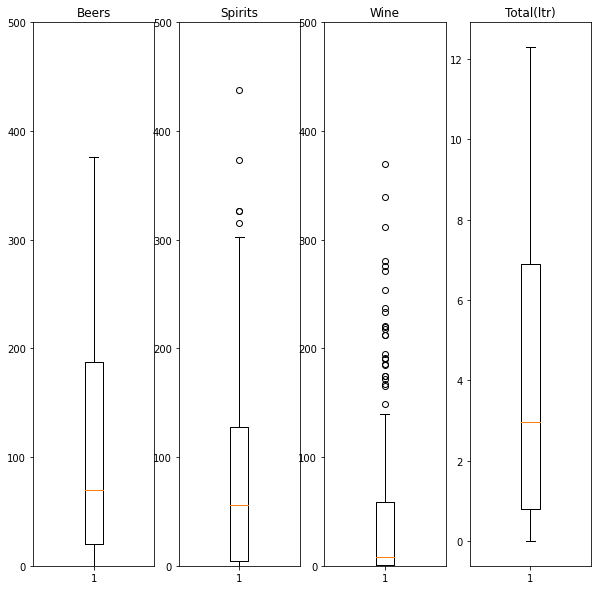

In [63]:
fig,ax = plt.subplots(1,4,figsize=(10, 10))

ax[0].boxplot(df['beer_servings'])
ax[0].set_ylim(0,500)
ax[0].set_title('Beers')

ax[1].boxplot(df['spirit_servings'])
ax[1].set_ylim(0,500)
ax[1].set_title('Spirits')

ax[2].boxplot(df['wine_servings'])
ax[2].set_ylim(0,500)
ax[2].set_title('Wine')

ax[3].boxplot(df['total_litres_of_pure_alcohol'])
ax[3].set_title('Total(ltr)')

In [64]:
 mean_beer=np.mean(df.beer_servings)
 mean_wine=np.mean(df.wine_servings)
 mean_spirit=np.mean(df.spirit_servings)
 print('Median beer: ', mean_beer)
 print('Median spirits: ',mean_spirit)
 print('Median wine: ',mean_wine)
 

Median beer:  105.4578947368421
Median spirits:  80.77894736842106
Median wine:  48.04736842105263


In [65]:
print('Avg beer: ', np.median(df.beer_servings))
print('Avg spirits: ',np.median(df.spirit_servings))
print('Avg Wine: ',np.median(df.wine_servings))


Avg beer:  70.0
Avg spirits:  55.5
Avg Wine:  8.0


In [66]:
df.head(5)
#df.total_litres_of_pure_alcohol

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.0,0.0,0.0,0.0000
1,Albania,89.0,132.0,54.0,4.8675
2,Algeria,25.0,0.0,14.0,0.6903
3,Andorra,245.0,138.0,312.0,12.3015
4,Angola,217.0,57.0,45.0,5.6463


In [67]:
df[(df['total_litres_of_pure_alcohol'] > 0.1) & (df['total_litres_of_pure_alcohol'] < 0.5) ]  # Lo vemos mejor en plots...

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
19,Bhutan,23.0,0.0,0.0,0.4071
32,Central African Republic,17.0,2.0,1.0,0.3540
33,Chad,15.0,1.0,1.0,0.3009
52,Egypt,6.0,4.0,1.0,0.1947
55,Eritrea,18.0,0.0,0.0,0.3186
57,Ethiopia,20.0,3.0,0.0,0.4071
62,Gambia,8.0,0.0,1.0,0.1593
69,Guinea,9.0,0.0,2.0,0.1947
77,Indonesia,5.0,1.0,0.0,0.1062
79,Iraq,9.0,3.0,0.0,0.2124


In [68]:
df[((df['beer_servings']<0.001)| (df['spirit_servings']<0.001) | (df['wine_servings']<0.001))&(df['total_litres_of_pure_alcohol']>1.0)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
27,Burundi,88.0,0.0,0.0,1.5576
39,Cook Islands,0.0,254.0,74.0,5.8056
54,Equatorial Guinea,92.0,0.0,233.0,5.7525
76,India,9.0,114.0,0.0,2.1771
91,Laos,62.0,0.0,123.0,3.2745
94,Lesotho,82.0,29.0,0.0,1.9647
119,Nauru,49.0,0.0,8.0,1.0089
159,Sri Lanka,16.0,104.0,0.0,2.1240


In [69]:
print(df.isna().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64


# DATA TO FILTER AND MERGE

## Should use data_life filtered by different KPI (WHO001 , 2 & 15)

I am only interested in WHOSIS_0001... for both genders

In [70]:
life_df = data_life[['GhoCode', 'RegionCode','WorldBankIncomeGroupGroupCode','CountryDisplay','SexCode','Numeric']]
life_df.head(3)

,GhoCode,RegionCode,WorldBankIncomeGroupGroupCode,CountryDisplay,SexCode,Numeric
0,WHOSIS_000001,EMR,NaN,Afghanistan,BTSX,61.25205
1,WHOSIS_000001,EMR,NaN,Afghanistan,FMLE,61.97733
2,WHOSIS_000001,EMR,NaN,Afghanistan,MLE,60.51228


In [71]:
#life_df=data_life.drop('CountryDisplay',axis=1) ... Not in this way...

#life_df2=life_df.loc[(life_df['CountryDisplay']=='Guinea') & (life_df['GhoCode']=='WHOSIS_000001') & (life_df.isna().any(axis=1))]
#life_df2=life_df.loc[ (life_df['GhoCode']=='WHOSIS_000001') & (life_df.isna().any(axis=1))]
life_df2=life_df.loc[ (life_df['GhoCode']=='WHOSIS_000001') & (life_df.isna().any(axis=1))]



In [72]:
life_df2.shape # 194countries x 3 categories (Male,Female, Both)

(582, 6)

In [73]:
life_df2.rename(columns = {'CountryDisplay':'country'}, inplace = True) #Rename of the column tag (could be done before....)

In [74]:
print(life_df2['country'].value_counts())

Afghanistan                     3
St. Vincent & the Grenadines    3
Niger                           3
Nigeria                         3
Niue                            3
                               ..
Greece                          3
Grenada                         3
Guatemala                       3
Guinea                          3
Zimbabwe                        3
Name: country, Length: 194, dtype: int64


In [75]:
life_df2.head(5)

,GhoCode,RegionCode,WorldBankIncomeGroupGroupCode,country,SexCode,Numeric
0,WHOSIS_000001,EMR,NaN,Afghanistan,BTSX,61.25205
1,WHOSIS_000001,EMR,NaN,Afghanistan,FMLE,61.97733
2,WHOSIS_000001,EMR,NaN,Afghanistan,MLE,60.51228
33,WHOSIS_000001,EUR,NaN,Albania,BTSX,74.13000
34,WHOSIS_000001,EUR,NaN,Albania,FMLE,75.50800


In [76]:
data_drink.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,NaN
1,Albania,89,132,54,NaN
2,Algeria,25,0,14,NaN
3,Andorra,245,138,312,NaN
4,Angola,217,57,45,NaN


In [102]:
df_merge=pd.merge(df,life_df2,how='outer',on='country')
print(df_merge.shape)
df_merge.head(5)

(582, 10)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,RegionCode,WorldBankIncomeGroupGroupCode,SexCode,Numeric
0,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,NaN,BTSX,61.25205
1,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,NaN,FMLE,61.97733
2,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,NaN,MLE,60.51228
3,Albania,89.0,132.0,54.0,4.8675,WHOSIS_000001,EUR,NaN,BTSX,74.13000
4,Albania,89.0,132.0,54.0,4.8675,WHOSIS_000001,EUR,NaN,FMLE,75.50800


---

In [177]:
life_df_bank=life_df[['CountryDisplay','WorldBankIncomeGroupGroupCode']]
life_df_bank=life_df_bank.drop_duplicates()
life_df_bank=life_df_bank.dropna()
life_df_bank.rename(columns = {'CountryDisplay':'country'}, inplace = True) #Rename of the column tag (could be done before....)
life_df_bank

,country,WorldBankIncomeGroupGroupCode
3,Afghanistan,WB_LI
36,Albania,WB_LMI
69,Algeria,WB_UMI
102,Andorra,WB_HI
135,Angola,WB_LMI
...,...,...
6246,Venezuela,WB_UMI
6279,Vietnam,WB_LI
6312,Yemen,WB_LI
6345,Zambia,WB_LI


In [180]:
df_merge=pd.merge(df_merge,life_df_bank,how='outer',on='country')
df_merge.rename(columns = {'WorldBankIncomeGroupGroupCode_y':'BankIncomeGroup'}, inplace = True) #Rename of the column tag (could be done before....)
df_merge

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,RegionCode,WorldBankIncomeGroupGroupCode_x,SexCode,Numeric,BankIncomeGroup
0,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,NaN,BTSX,61.25205,WB_LI
1,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,NaN,FMLE,61.97733,WB_LI
2,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,NaN,MLE,60.51228,WB_LI
3,Albania,89.0,132.0,54.0,4.8675,WHOSIS_000001,EUR,NaN,BTSX,74.13000,WB_LMI
4,Albania,89.0,132.0,54.0,4.8675,WHOSIS_000001,EUR,NaN,FMLE,75.50800,WB_LMI
...,...,...,...,...,...,...,...,...,...,...,...
580,South Sudan,NaN,NaN,NaN,NaN,WHOSIS_000001,AFR,NaN,MLE,55.34608,WB_LI
581,South Sudan,NaN,NaN,NaN,NaN,WHOSIS_000001,AFR,NaN,MLE,55.34608,WB_LMI
582,Macedonia,NaN,NaN,NaN,NaN,WHOSIS_000001,EUR,NaN,BTSX,75.71539,WB_UMI
583,Macedonia,NaN,NaN,NaN,NaN,WHOSIS_000001,EUR,NaN,FMLE,77.82406,WB_UMI


---

In [185]:
df_merge_oh = pd.get_dummies(df_merge,columns=['RegionCode','SexCode'],drop_first=False) 
df_merge_oh.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,WorldBankIncomeGroupGroupCode_x,Numeric,BankIncomeGroup,RegionCode_AFR,RegionCode_AMR,RegionCode_EMR,RegionCode_EUR,RegionCode_SEAR,RegionCode_WPR,SexCode_BTSX,SexCode_FMLE,SexCode_MLE
0,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,NaN,61.25205,WB_LI,0,0,1,0,0,0,1,0,0
1,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,NaN,61.97733,WB_LI,0,0,1,0,0,0,0,1,0
2,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,NaN,60.51228,WB_LI,0,0,1,0,0,0,0,0,1
3,Albania,89.0,132.0,54.0,4.8675,WHOSIS_000001,NaN,74.13000,WB_LMI,0,0,0,1,0,0,1,0,0
4,Albania,89.0,132.0,54.0,4.8675,WHOSIS_000001,NaN,75.50800,WB_LMI,0,0,0,1,0,0,0,1,0



WB_HI     1377 (HIGH)

WB_UMI    1215 (UPPER MIDDLE)

WB_LMI    1440  (LOW MIDDLE)

WB_LI     1212 (LOW)

Name: WorldBankIncomeGroupGroupCode, dtype: int64\

In [193]:
bank_income=pd.DataFrame([['WB_LI'],
                 ['WB_LMI'],
                 ['WB_UMI'],
                 ['WB_HI']])
bank_income.columns=['income']
bank_income

,income
0,WB_LI
1,WB_LMI
2,WB_UMI
3,WB_HI


In [195]:
bank_income['income_fact'] = pd.factorize(bank_income['income'])[0]
bank_income

,income,income_fact
0,WB_LI,0
1,WB_LMI,1
2,WB_UMI,2
3,WB_HI,3


In [194]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# like factorizy, LabelEncoder returns an array, thus you can just do: 
df_merge_oh['income_fact'] = encoder.fit_transform(bank_income['income'])
df_merge_oh

ValueError: ignored

In [192]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# like factorizy, LabelEncoder returns an array, thus you can just do: 
df_merge_oh['income_fact'] = encoder.fit_transform(bank_income['BankIncomeGroup'])
df_merge_oh

KeyError: ignored

#4. Visualización de los datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c63d87550>,
      dtype=object)

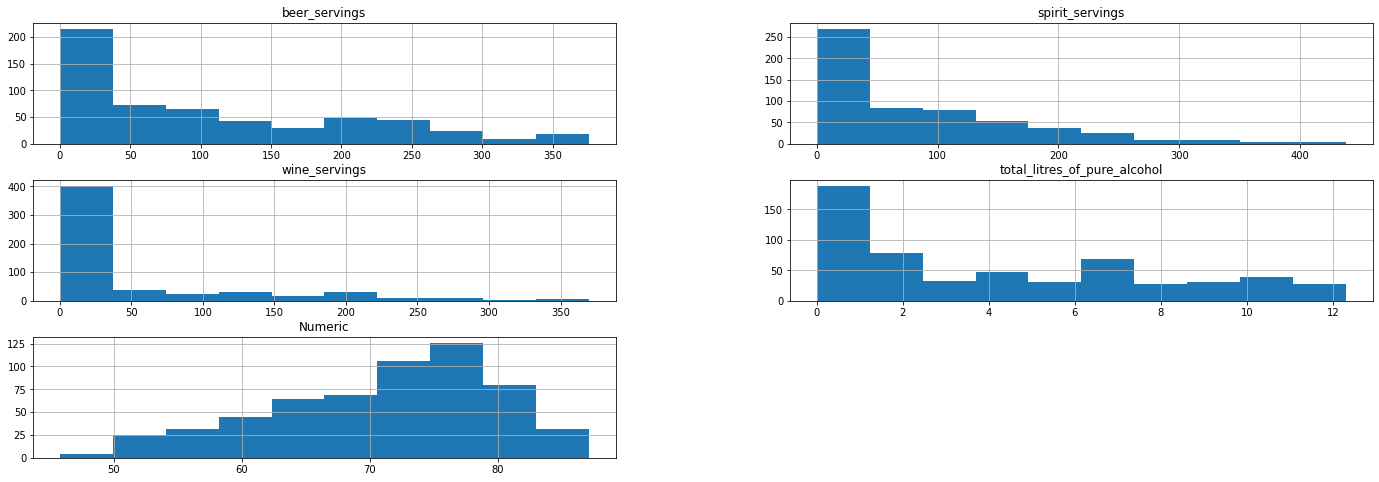

In [154]:
df_merge.hist(figsize=(24,8))

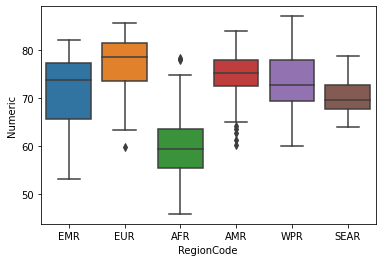

In [156]:
sns.boxplot(data=df_merge, x='RegionCode', y='Numeric')

In [161]:
df_merge[((df_merge['RegionCode']=='AMR') &(df_merge['Numeric']<70) )]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,RegionCode,WorldBankIncomeGroupGroupCode,SexCode,Numeric
57,Bolivia,167.0,41.0,8.0,3.8232,WHOSIS_000001,AMR,NaN,BTSX,67.59440
59,Bolivia,167.0,41.0,8.0,3.8232,WHOSIS_000001,AMR,NaN,MLE,65.12350
155,El Salvador,52.0,69.0,2.0,2.1771,WHOSIS_000001,AMR,NaN,MLE,67.93980
197,Grenada,199.0,438.0,28.0,11.7705,WHOSIS_000001,AMR,NaN,MLE,69.52154
200,Guatemala,53.0,69.0,2.0,2.1948,WHOSIS_000001,AMR,NaN,MLE,68.47187
207,Guyana,93.0,302.0,1.0,7.0092,WHOSIS_000001,AMR,NaN,BTSX,63.53513
208,Guyana,93.0,302.0,1.0,7.0092,WHOSIS_000001,AMR,NaN,FMLE,67.03544
209,Guyana,93.0,302.0,1.0,7.0092,WHOSIS_000001,AMR,NaN,MLE,60.11777
210,Haiti,1.0,326.0,1.0,5.8056,WHOSIS_000001,AMR,NaN,BTSX,62.75648
211,Haiti,1.0,326.0,1.0,5.8056,WHOSIS_000001,AMR,NaN,FMLE,64.17588


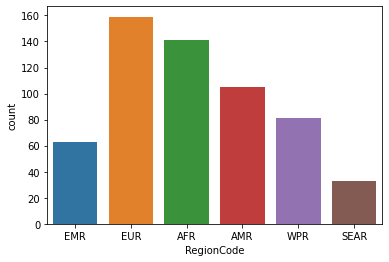

In [133]:
#SEAR - South East Asia
#WPR-  Western Pacific
#EMR  - Eastern Mediterranean

sns.countplot(data=df_merge, x=df_merge['RegionCode'])

In [138]:
df_merge_oh.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Numeric,RegionCode_AFR,RegionCode_AMR,RegionCode_EMR,RegionCode_EUR,RegionCode_SEAR,RegionCode_WPR,SexCode_BTSX,SexCode_FMLE,SexCode_MLE
beer_servings,1.000000e+00,4.614330e-01,5.231963e-01,8.770946e-01,0.405457,-2.043737e-01,2.356269e-01,-3.306685e-01,4.189750e-01,-2.217978e-01,-9.439114e-02,3.504329e-17,1.872891e-17,8.875023e-18
spirit_servings,4.614330e-01,1.000000e+00,2.013981e-01,7.230223e-01,0.331466,-4.058647e-01,3.520794e-01,-2.376360e-01,3.606766e-01,-1.028911e-01,-6.412573e-02,3.350605e-17,-6.282385e-18,-7.179869e-18
wine_servings,5.231963e-01,2.013981e-01,1.000000e+00,7.144752e-01,0.437354,-2.168252e-01,-6.514662e-02,-1.943826e-01,5.660083e-01,-1.506319e-01,-1.055192e-01,2.937288e-17,1.071941e-17,1.688096e-19
total_litres_of_pure_alcohol,8.770946e-01,7.230223e-01,7.144752e-01,1.000000e+00,0.501279,-3.524366e-01,2.390179e-01,-3.340695e-01,5.684884e-01,-2.077482e-01,-1.125657e-01,4.831464e-17,6.822206e-18,-6.263009e-18
Numeric,4.054567e-01,3.314658e-01,4.373536e-01,5.012790e-01,1.000000,-7.149431e-01,2.002450e-01,1.815648e-02,4.236295e-01,-1.735499e-02,1.124555e-01,-1.140463e-03,1.879371e-01,-1.867966e-01
RegionCode_AFR,-2.043737e-01,-4.058647e-01,-2.168252e-01,-3.524366e-01,-0.714943,1.000000e+00,-2.652930e-01,-1.970048e-01,-3.466719e-01,-1.386312e-01,-2.273599e-01,3.258418e-17,7.791868e-18,-2.786183e-17
RegionCode_AMR,2.356269e-01,3.520794e-01,-6.514662e-02,2.390179e-01,0.200245,-2.652930e-01,1.000000e+00,-1.634640e-01,-2.876496e-01,-1.150287e-01,-1.886510e-01,7.333605e-17,1.341754e-17,-1.710078e-17
RegionCode_EMR,-3.306685e-01,-2.376360e-01,-1.943826e-01,-3.340695e-01,0.018156,-1.970048e-01,-1.634640e-01,1.000000e+00,-2.136068e-01,-8.541957e-02,-1.400910e-01,-2.840979e-17,-9.035778e-18,4.884204e-18
RegionCode_EUR,4.189750e-01,3.606766e-01,5.660083e-01,5.684884e-01,0.423629,-3.466719e-01,-2.876496e-01,-2.136068e-01,1.000000e+00,-1.503139e-01,-2.465199e-01,-7.265035e-18,-6.129874e-18,-1.362194e-18
RegionCode_SEAR,-2.217978e-01,-1.028911e-01,-1.506319e-01,-2.077482e-01,-0.017355,-1.386312e-01,-1.150287e-01,-8.541957e-02,-1.503139e-01,1.000000e+00,-9.858128e-02,-3.674453e-17,2.569930e-18,1.607573e-17


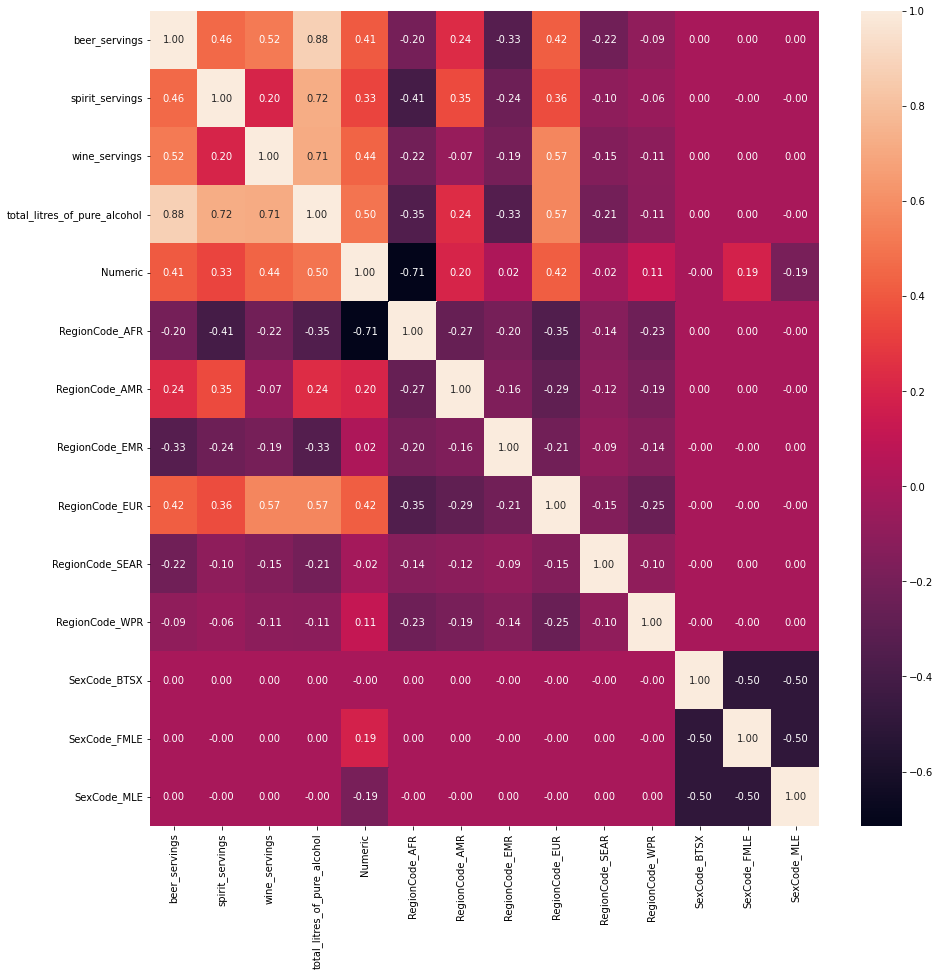

In [139]:
plt.figure(figsize=(15,15))
sns.heatmap(df_merge_oh.corr(), annot=True, fmt='.2f')

In [ ]:
sns.pairplot(df_merge_oh)

In [151]:
df_EUR=df_merge_oh[df_merge_oh['RegionCode_EUR']==1]
df_EUR=df_EUR[['total_litres_of_pure_alcohol','GhoCode','Numeric','SexCode_FMLE','SexCode_MLE']]


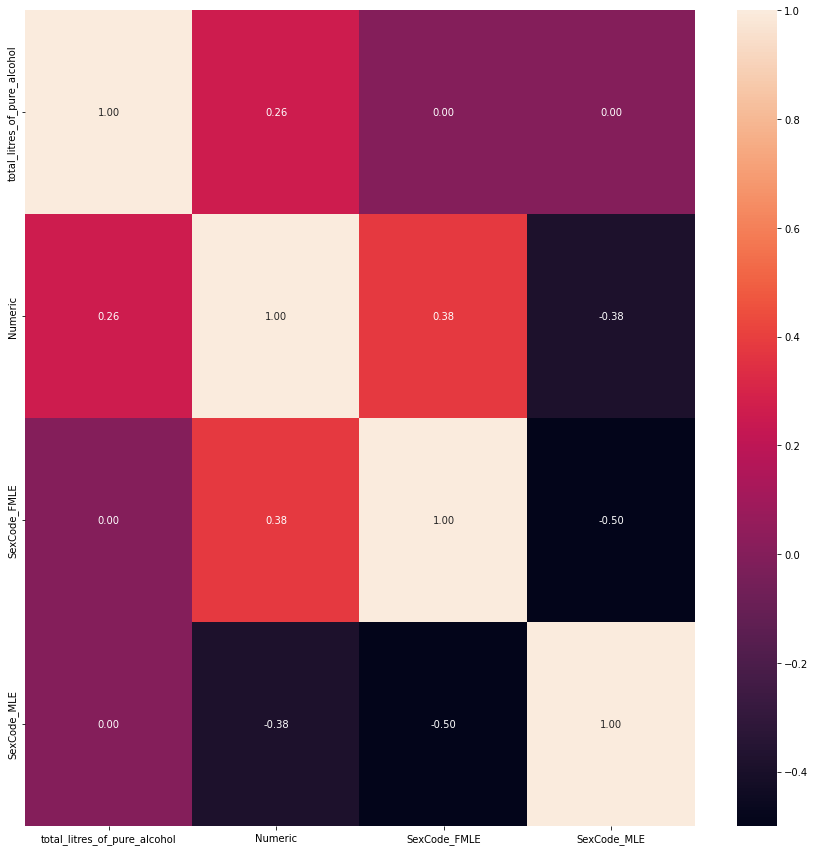

In [152]:
plt.figure(figsize=(15,15))
sns.heatmap(df_EUR.corr(), annot=True, fmt='.2f')

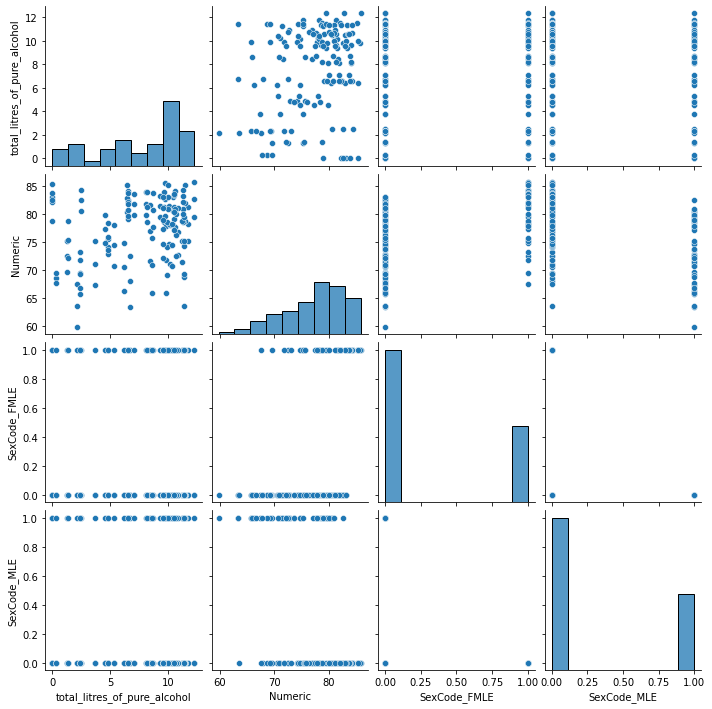

In [153]:
sns.pairplot(df_EUR)

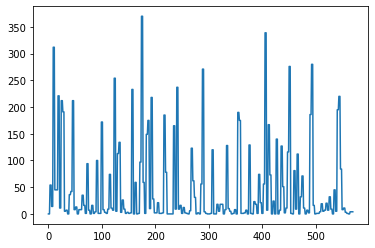

In [80]:
df_merge['wine_servings'].plot()

RegionCode
EUR    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Numeric, dtype: object

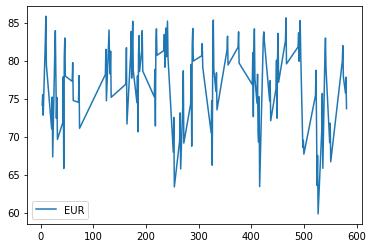

In [107]:
df_m1=df_merge[df_merge['RegionCode']=='EUR']
df_m1.groupby('RegionCode')['Numeric'].plot(legend=True)

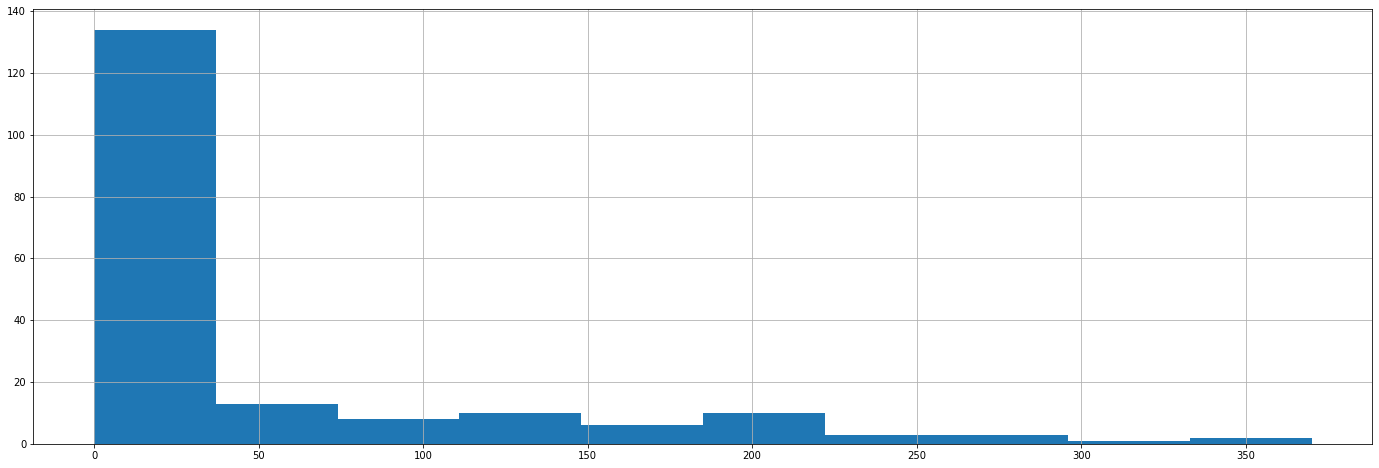

In [ ]:
df['wine_servings'].hist(figsize=(24,8))

In [ ]:
correlations = df.corr()
correlations

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,tempcalc
beer_servings,1.000000,0.461433,0.523196,0.629321,0.220482
spirit_servings,0.461433,1.000000,0.201398,0.967876,-0.307317
wine_servings,0.523196,0.201398,1.000000,0.417549,-0.158069
total_litres_of_pure_alcohol,0.629321,0.967876,0.417549,1.000000,-0.263208
tempcalc,0.220482,-0.307317,-0.158069,-0.263208,1.000000


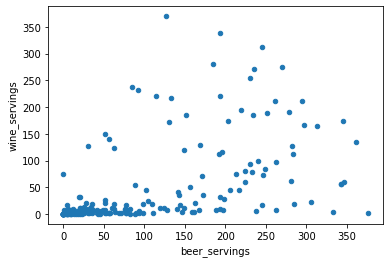

In [ ]:
df.plot(kind="scatter", x="beer_servings", y="wine_servings")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


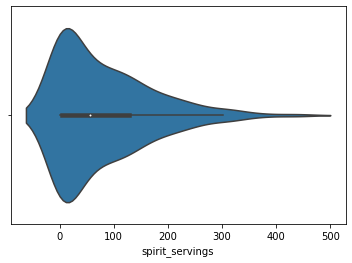

In [ ]:
sns.violinplot(df['spirit_servings'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f060b2a1a90>,
      dtype=object)

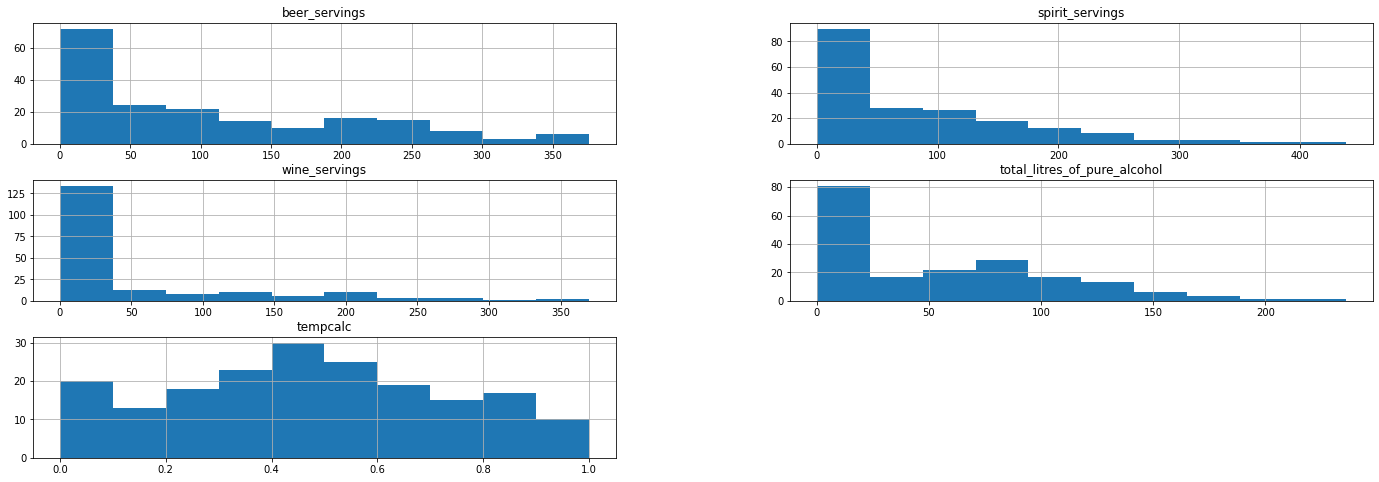

In [ ]:
df.hist(figsize=(24,8))

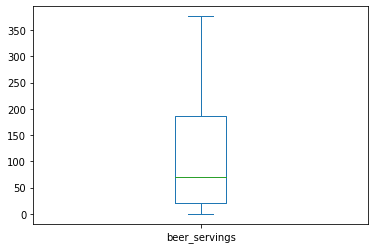

In [ ]:
df['beer_servings'].plot(kind='box')

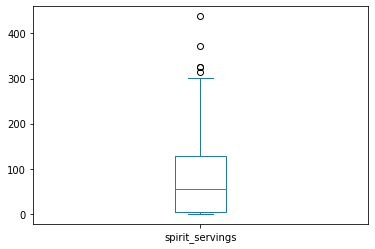

In [ ]:
df['spirit_servings'].plot(kind='box')


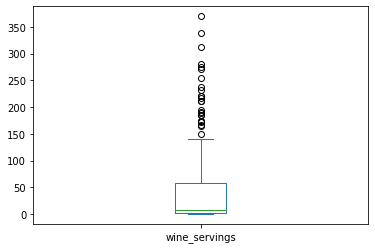

In [ ]:
df['wine_servings'].plot(kind='box')

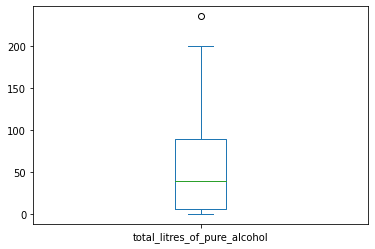

In [ ]:
df['total_litres_of_pure_alcohol'].plot(kind='box')

In [ ]:
df[df.total_litres_of_pure_alcohol == df.total_litres_of_pure_alcohol.max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,tempcalc
67,Grenada,199.0,438.0,28.0,236.01,0.299248


In [ ]:
df[df.total_litres_of_pure_alcohol == df.total_litres_of_pure_alcohol.min()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,tempcalc
0,Afghanistan,0.0,0.0,0.0,0.0,NaN
13,Bangladesh,0.0,0.0,0.0,0.0,NaN
78,Iran,0.0,0.0,0.0,0.0,NaN
89,Kuwait,0.0,0.0,0.0,0.0,NaN
96,Libya,0.0,0.0,0.0,0.0,NaN
103,Maldives,0.0,0.0,0.0,0.0,NaN
106,Marshall Islands,0.0,0.0,0.0,0.0,NaN
107,Mauritania,0.0,0.0,0.0,0.0,NaN
112,Monaco,0.0,0.0,0.0,0.0,NaN
127,North Korea,0.0,0.0,0.0,0.0,NaN


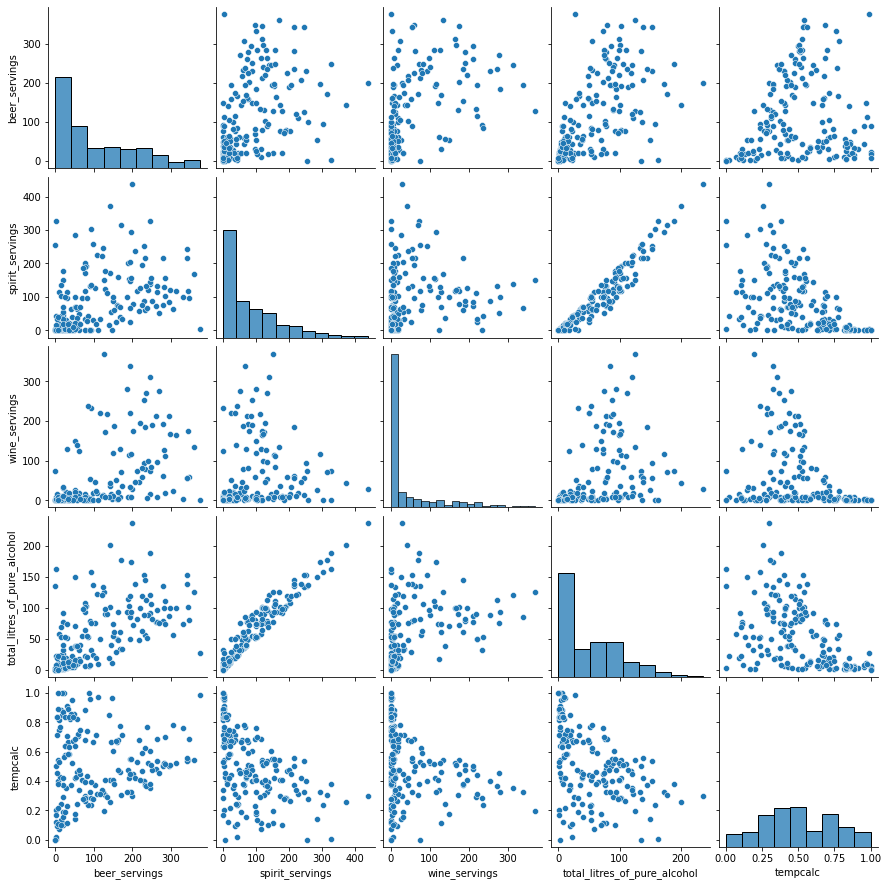

In [ ]:
import seaborn as sns

#sns.countplot(data=df, x=df['total_litres_of_pure_alcohol'])
sns.pairplot(df)